**Final Year Project**
---

# Ebay Images Web Scraper for Datasets

In [0]:
from bs4 import BeautifulSoup
from PIL import Image
from google.colab import drive
import numpy as np
import requests
import hashlib
import re
import io
import os
 

# List of things to search for on ebay
search = "hallmarked rose gold"# ,"hallmarked yellow gold",  "hallmarked white gold"

# Returns the url for the item listing
def Make_Search_urls(search):
    # eBay url to attached search term to
    ebay_url = "https://www.ebay.co.uk/sch/i.html?_from=R40&_trksid=m570.l1313&_nkw="

    product_name = search

    # text needed before adding page number 
    url_seperator = "&_sacat=0&_pgn="

    # add page looping to reach more results
    pages = 80

    # List of urls created
    urls = []

    for x in range(1, pages):
        # Adds the name of item being searched to the end of the eBay url and appends it to the urls list
        # In order for it to work the spaces need to be replaced with a +
        url = ebay_url + product_name.replace(" ", "+") + url_seperator + str(x)
        #print("Search URL : " + url)
        urls.append(url)

    # Returns the list of completed urls
    #print(urls)
    return urls 

    ##########################################################################################################
    #
    # Title:        <Make_Search_urls>
    # Author:       <Omni Analytics Group>
    # Date:         <1/05/20>
    # Code Version: 1.0
    # Availablity:  https://omnianalytics.io/2018/08/28/ebay-web-scrape-tutorial/    #
    #
    ##########################################################################################################


# Scrapes and prints the url of the item's image result listed on eBay
def Product_Page_Scrape(urls):

    product_listing = []

    for url in urls:
        # Downloads the eBay page for processing
        res = requests.get(url)
        # Shows an exception error if page doesn't download correctly
        res.raise_for_status()
        # Creates a BeautifulSoup object for HTML parsing
        soup = BeautifulSoup(res.text, 'html.parser')
        # Finds all the listing images for each product per page
        product_pages = soup.find_all('img',{"class" : "img"})
        for picUrl in product_pages:
          if "https://i.ebayimg.com/thumbs/images/" in str(picUrl['src']):
            #print(picUrl['src'])    
            product_listing.append(picUrl['src'])

    print("Product Images Found : ", len(product_listing))
    return product_listing

# Download the images into a labelled folder
def Download_Image(urls):
  # mount my google drive folder to colab
  drive.mount('/content/drive')
  DataSetPath = 'drive/My Drive/Datasets/'
  classificationFolder = f'{DataSetPath}RoseGold'
  for url in urls:
    try:
        # get the url for each of the images
        productImage = requests.get(url).content

    except Exception as e:
        # show any errors with image url and the repective problem
        print(f"{url} - {e}")

    try:
        image_file = io.BytesIO(productImage)
        # Opens the current image
        image = Image.open(image_file).convert('RGB')
        # Make a new file path for the image and name it with random hexidecimals then save it
        file_path = os.path.join(classificationFolder,hashlib.sha1(productImage).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=100)
    except Exception as e:
        print(f"{productImage} - {e}")

    ##########################################################################################################
    #
    # Title:        <Download_Image>
    # Author:       <Fabian Bosler>
    # Date:         <1/05/20>
    # Code Version: 1.0
    # Availablity:  https://towardsdatascience.com/image-scraping-with-python-a96feda8af2d   
    #
    ##########################################################################################################

# How to run the code
# 1. Change the search definition
# 2. Change the classificationFolder name
# 3. Run The Ebay Scraper

Download_Image(Product_Page_Scrape(Make_Search_urls(search)))

Product Images Found :  209
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Construct Datasets

In [0]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Set the directiory for the datasets
datasetDir = "/content/drive/My Drive/Datasets"
# Name the identifier labels
identifier = ["WhiteGold", "YellowGold", "RoseGold"]


In [3]:
trainingSet = []

def makeTrainingSet():
  for ident in identifier:
    try:      
      path = os.path.join(datasetDir, ident)
      print(path)
      classNumber = identifier.index(ident)  
      for img in tqdm(os.listdir(path)):
        
          # For each image in the dataest folders ignore the folder created by google colab
          if img == ".ipynb_checkpoints":
            print(".ipynb_checkpoints found")
          else:
              origImage = plt.imread(os.path.join(path,img))
              resizedImg = cv2.resize(origImage, (150, 150))
              trainingSet.append([resizedImg, classNumber])
    except Exception as e:
        print(e)

makeTrainingSet()

print(len(trainingSet))


  0%|          | 0/405 [00:00<?, ?it/s]

/content/drive/My Drive/Datasets/WhiteGold


  0%|          | 0/529 [00:00<?, ?it/s]

/content/drive/My Drive/Datasets/YellowGold


 87%|████████▋ | 460/529 [03:10<00:23,  2.90it/s]

.ipynb_checkpoints found


  0%|          | 0/176 [00:00<?, ?it/s]

/content/drive/My Drive/Datasets/RoseGold


100%|██████████| 176/176 [01:02<00:00,  2.84it/s]

1109


In [4]:
print(len(trainingSet))
#There are 1157 images in the training set

1109


In [0]:
import random

random.shuffle(trainingSet)

1


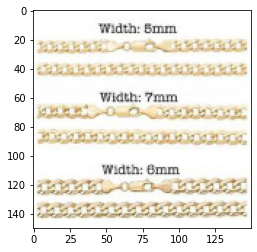

0


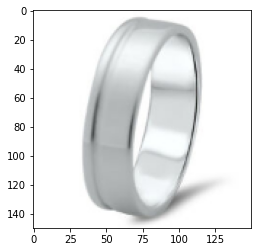

1


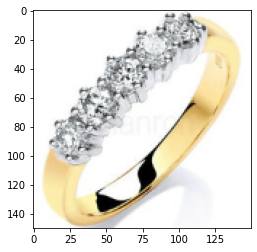

In [11]:
for sample in trainingSet[:3]:
  print(sample[1])
  plt.imshow(sample[0])
  plt.show()

In [27]:
# X for feature set
X = []
# y for labels
y = []
#y = np.array(y)

for features,label in trainingSet:
    X.append(features)
    y.append(label)
    #y = np.array((y, label))
    #y = np.array(y)

# -1 - catch all the features that the model has
# 255, 255 the image size
# 3 - RBG 3 channel for colour images
X = np.array(X).reshape(-1, 150, 150, 3)
print(X[0])
print()

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[252 255 255]
  [252 255 254]
  [254 255 255]
  ...
  [254 254 252]
  [254 254 252]
  [255 255 254]]

 [[251 255 255]
  [252 255 254]
  [253 255 253]
  ...
  [254 254 252]
  [254 255 250]
  [255 255 254]]

 [[254 255 255]
  [255 255 255]
  [255 255 254]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 255]]]



In [0]:
#save the dataset so it doesnt need to be redone it each time
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

##########################################################################################################
    #
    # Title:        <Loading-Custom-Data>
    # Author:       <PythonProgramming>
    # Date:         <3/05/20>
    # Code Version: 1.0
    # Availablity:  https://pythonprogramming.net/loading-custom-data-deep-learning-python-tensorflow-keras/   
    #
    ##########################################################################################################


# Model Construction and Training

In [0]:
# Build Model
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

X = pickle.load(open("X.pickle", "rb"))
y = np.array(pickle.load(open("y.pickle", "rb")))

X = X / 255

In [33]:


model = Sequential([
  # Layer 1
  Conv2D(16, (3,3),activation="relu", input_shape = X.shape[1:]),
	MaxPooling2D(),

  # Layer 2
  Conv2D(32, (3,3), activation="relu"),
	MaxPooling2D(),

  # Layer 3
  Conv2D(64, (3,3), activation="relu"),
	MaxPooling2D(),

  # Layer 4
  Flatten(),
	Dense(512, activation="relu"),
 
  # Output layer 5
  Dense(3, activation="softmax"),
	])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# Batch size is how many images you pass into the model at a time 20 for my dataset size
# Validation split for out of sample data for testing
history = model.fit(X, y, batch_size=20, validation_split=0.1, epochs=10)


Epoch 1/10
50/50 [==============================] - 21s 415ms/step - loss: 1.3302 - accuracy: 0.4489 - val_loss: 1.0050 - val_accuracy: 0.5045
Epoch 2/10
50/50 [==============================] - 21s 411ms/step - loss: 1.0187 - accuracy: 0.4609 - val_loss: 1.0307 - val_accuracy: 0.4505
Epoch 3/10
50/50 [==============================] - 21s 410ms/step - loss: 0.9737 - accuracy: 0.5411 - val_loss: 0.8932 - val_accuracy: 0.6486
Epoch 4/10
50/50 [==============================] - 21s 411ms/step - loss: 0.8837 - accuracy: 0.6022 - val_loss: 0.8891 - val_accuracy: 0.6486
Epoch 5/10
50/50 [==============================] - 21s 414ms/step - loss: 0.7635 - accuracy: 0.6804 - val_loss: 0.8741 - val_accuracy: 0.6847
Epoch 6/10
50/50 [==============================] - 21s 412ms/step - loss: 0.6097 - accuracy: 0.7575 - val_loss: 1.0655 - val_accuracy: 0.6486
Epoch 7/10
50/50 [==============================] - 21s 415ms/step - loss: 0.5107 - accuracy: 0.7996 - val_loss: 1.0993 - val_accuracy: 0.6036

In [0]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 18496)           

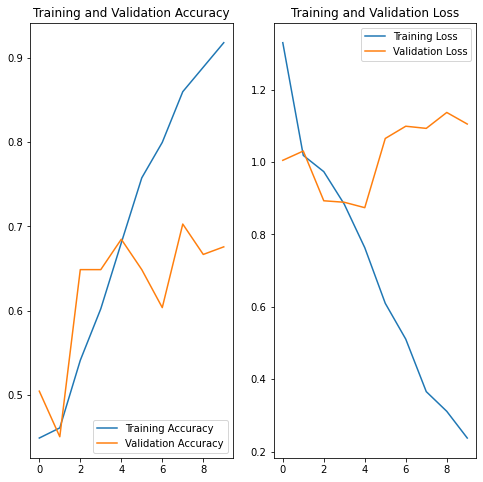

In [36]:
#Produce a graph showing accuracy and loss for valiation and testing
#history = model.fit(X, y, batch_size=20, validation_split=0.1, epochs=10)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:

##########################################################################################################
    #
    # Title:        <Image classification tutorial>
    # Author:       <Tensorflow>
    # Date:         <5/05/20>
    # Code Version: 1.0
    # Availablity:  https://www.tensorflow.org/tutorials/images/classification   
    #
    ##########################################################################################################


# Identifying Test

Type of Gold - RoseGold
Model Predicted - YellowGold


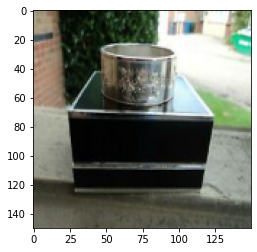

In [51]:
indentification = model.predict(X)
plt.imshow(X[15])
print(f"Type of Gold - {identifier[y[15]]}")
print(f"Model Predicted - {identifier[np.argmax(indentification[3])]}")

# Server For Gold Idenification App

In [0]:
import portpicker
import threading
import socket
import IPython

from six.moves import socketserver
from six.moves import SimpleHTTPServer

class V6Server(socketserver.TCPServer):
  address_family = socket.AF_INET6

class Handler(SimpleHTTPServer.SimpleHTTPRequestHandler):
  def do_GET(self):
    self.send_response(200)
    # If the response should not be cached in the notebook for
    # offline access:
    # self.send_header('x-colab-notebook-cache-control', 'no-cache')
    self.end_headers()
    self.wfile.write(b'''
      document.querySelector('#output-area').appendChild(document.createTextNode('Script result!'));
    ''')

port = portpicker.pick_unused_port()

def server_entry():
    httpd = V6Server(('::', port), Handler)
    # Handle a single request then exit the thread.
    httpd.serve_forever()

thread = threading.Thread(target=server_entry)
thread.start()

# Display some HTML referencing the resource.
display(IPython.display.HTML('<script src="https://localhost:{port}/"></script>'.format(port=port)))
print('<script src="https://localhost:{port}/"></script>'.format(port=port))


display(IPython.display.HTML('''
    <button id='button'>CHeck For Incoming data</button>
    <script>
      document.querySelector('#button').onclick = () => {
        google.colab.kernel.invokeFunction('notebook.AddListItem', [], {});
      };
    </script>
    '''))

def CheckForMessage():
  # Use redirect_to_element to direct the elements which are being written.
  with output.redirect_to_element('#items'):
    # Use display to add items which will be persisted on notebook reload.
    display(IPython.display.HTML('<li> Image Recieved</li>'))

output.register_callback('notebook.AddListItem', add_list_item)

##########################################################################################################
    #
    # Title:        <Server Sockets>
    # Author:       <Google>
    # Date:         <6/05/20>
    # Code Version: 1.0
    # Availablity:  https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=_7dYIo63EdgL   
    #
    ##########################################################################################################

<script src="https://localhost:16764/"></script>


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>